https://mlwhiz.com/blog/2017/12/28/hyperopt_tuning_ml_model/

In [20]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from matplotlib import pyplot

In [21]:
df = pd.read_csv("../data/train.csv", sep=",")
X = df[df.columns[2:]].astype(float).values
Y = np.array(df['target']).astype(float)

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

#X_train, Y_train, X_test, Y_test = X[:-60000,:], Y[:-60000], X[-60000:,:], Y[-60000:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state=90, stratify = Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140000, 200)
(140000,)
(60000, 200)
(60000,)


In [23]:
def objective(space):
    print(space)
    clf = xgb.XGBClassifier(n_estimators =1000,
                            n_jobs = 3,
                            objective='binary:logistic', 
                            colsample_bytree=space['colsample_bytree'],
                            learning_rate = .3,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            gamma = space['gamma'],
                            reg_lambda = space['reg_lambda'],)

    eval_set  = [( X_test, Y_test)]

    clf.fit(X_train, Y_train,
            eval_set=eval_set, 
            eval_metric="auc",
            early_stopping_rounds=10,
            verbose=False)

    pred = clf.predict(X_test)
    auc_score = roc_auc_score(Y_test, pred)
    print("SCORE:", auc_score)
    #change the metric if you like
    return {'loss':-auc_score, 'status': STATUS_OK}

In [24]:
space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.7,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
    }

In [25]:
#space ={'max_depth': hp.quniform("max_depth", 4, 16, 1),
#        'min_child_weight': hp.quniform ('min_child', 1, 10, 1),
#        'subsample': hp.uniform ('subsample', 0.7, 1),
#        'gamma' : hp.uniform ('gamma', 0.1,0.5),
#        'colsample_bytree' : hp.uniform ('colsample_bytree', 0.7,1),
#        'reg_lambda' : hp.uniform ('reg_lambda', 0,1)}

In [26]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2,
            trials=trials)

print(best)
# Use **best

{'colsample_bytree': 0.9455889562134518, 'gamma': 0.4375702301753679, 'max_depth': 15.0, 'min_child_weight': 9.0, 'reg_lambda': 0.867296886569109, 'subsample': 0.9352506344261118}
SCORE:                                                                                                                                                                 
0.6241867176852215                                                                                                                                                     
{'colsample_bytree': 0.8181359580629111, 'gamma': 0.12865333906282406, 'max_depth': 5.0, 'min_child_weight': 1.0, 'reg_lambda': 0.7860163519448321, 'subsample': 0.9900809000860864}
SCORE:                                                                                                                                                                 
0.6317149523414065                                                                                                                     

In [27]:
best

{'x_colsample_bytree': 0.8181359580629111,
 'x_gamma': 0.12865333906282406,
 'x_max_depth': 5.0,
 'x_min_child': 1.0,
 'x_reg_lambda': 0.7860163519448321,
 'x_subsample': 0.9900809000860864}

In [29]:
clf = xgb.XGBClassifier(n_estimators =1000,
                        n_jobs = 3,
                        objective='binary:logistic', 
                        learning_rate = .3,
                        colsample_bytree = 0.8181359580629111,
                        gamma = 0.12865333906282406,
                        max_depth = 5,
                        min_child = 1.0,
                        reg_lambda = 0.7860163519448321,
                        subsample = 0.9900809000860864)

eval_set  = [( X_train, Y_train),( X_test, Y_test)]

clf.fit(X_train, Y_train,
        eval_set=eval_set, 
        eval_metric="auc",
        early_stopping_rounds=5,
        verbose=True)

[0]	validation_0-auc:0.627321	validation_1-auc:0.615779
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.680439	validation_1-auc:0.661029
[2]	validation_0-auc:0.705777	validation_1-auc:0.687782
[3]	validation_0-auc:0.718158	validation_1-auc:0.695267
[4]	validation_0-auc:0.731491	validation_1-auc:0.70715
[5]	validation_0-auc:0.74581	validation_1-auc:0.716727
[6]	validation_0-auc:0.755612	validation_1-auc:0.725481
[7]	validation_0-auc:0.771718	validation_1-auc:0.73754
[8]	validation_0-auc:0.779537	validation_1-auc:0.743911
[9]	validation_0-auc:0.790642	validation_1-auc:0.753551
[10]	validation_0-auc:0.797538	validation_1-auc:0.758555
[11]	validation_0-auc:0.807092	validation_1-auc:0.765859
[12]	validation_0-auc:0.81562	validation_1-auc:0.772074
[13]	validation_0-auc:0.821565	validation_1-auc:0.777692
[14]	validation_0-auc:0.826279	validation_1-auc:0.781304
[15

[142]	validation_0-auc:0.974697	validation_1-auc:0.868029
[143]	validation_0-auc:0.974991	validation_1-auc:0.868199
[144]	validation_0-auc:0.975285	validation_1-auc:0.868379
[145]	validation_0-auc:0.97545	validation_1-auc:0.868358
[146]	validation_0-auc:0.975712	validation_1-auc:0.868649
[147]	validation_0-auc:0.975964	validation_1-auc:0.868753
[148]	validation_0-auc:0.976178	validation_1-auc:0.868654
[149]	validation_0-auc:0.976423	validation_1-auc:0.868736
[150]	validation_0-auc:0.976647	validation_1-auc:0.868927
[151]	validation_0-auc:0.97688	validation_1-auc:0.86894
[152]	validation_0-auc:0.977116	validation_1-auc:0.869013
[153]	validation_0-auc:0.977353	validation_1-auc:0.869203
[154]	validation_0-auc:0.977635	validation_1-auc:0.869104
[155]	validation_0-auc:0.977903	validation_1-auc:0.869123
[156]	validation_0-auc:0.978189	validation_1-auc:0.869153
[157]	validation_0-auc:0.97854	validation_1-auc:0.869053
[158]	validation_0-auc:0.978767	validation_1-auc:0.868907
Stopping. Best ite

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8181359580629111, gamma=0.12865333906282406,
       learning_rate=0.3, max_delta_step=0, max_depth=5, min_child=1.0,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=3,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.7860163519448321, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9900809000860864)

In [30]:
pred_train = clf.predict(X_train)
auc_score_train = roc_auc_score(Y_train, pred_train)
auc_score_train

0.7970577931782719

In [31]:
pred_test = clf.predict(X_test)
auc_score_test = roc_auc_score(Y_test, pred_test)
auc_score_test

0.6317149523414065

In [32]:
pred = clf.predict(X)
auc_score = roc_auc_score(Y, pred)
auc_score

0.7474581018197434

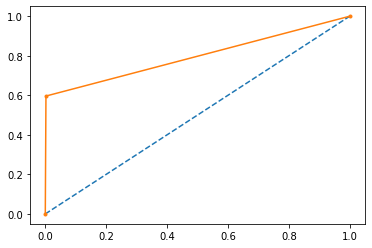

In [33]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, pred_train)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

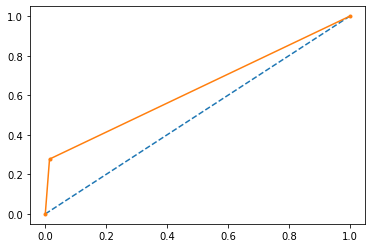

In [34]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, pred_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

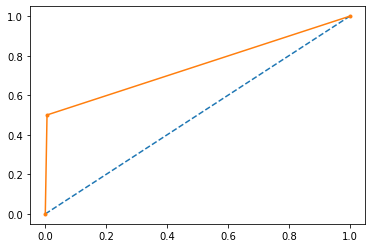

In [35]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y, pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

Predictions (try maybe predict_proba)

In [87]:
df_test = pd.read_csv("../data/test.csv", sep=",")
X_test = df_test[df_test.columns[1:]].astype(float).values
X_test = scaler.fit_transform(X_test)

y_preds = clf.predict_proba(X)[:,1]
y_test_preds = clf.predict_proba(X_test)[:,1]

In [88]:
# How to threshold for an imbalanced problem
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [89]:
y_clf = Y
threshold = Find_Optimal_Cutoff(y_clf, y_preds)[0]
threshold

0.023403296247124672

In [90]:
y_p = np.where(y_preds>threshold,1,0).reshape(-1)
y_test_p = np.where(y_test_preds>threshold,1,0).reshape(-1)

In [91]:
confusion_matrix(y_clf, y_p)

array([[165718,  14184],
       [  1584,  18514]])

In [92]:
np.array(y_clf == y_p).mean()

0.92116

In [95]:
Train_results = pd.DataFrame({'ID_code' : df['ID_code'].tolist(),'actual' : y_clf,'pred' : y_preds})

Train_results.to_csv("../results/TrainResults_Trial3.csv", index = False)

Test_results = pd.DataFrame({'ID_code' : df_test['ID_code'].tolist(),'target' : y_test_p})

Test_results.to_csv("../results/TestResults_Trial3.csv", index = False)